In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip list

In [3]:
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

In [109]:
class lowXCorr:
    def __init__(self,name):
        self.name = name
        self.model = self.getModel()
        self.A = None
        self.read_df()
        self.getAngleList()
        self.getTargList()
    
    def read_df(self):
            self.df = pd.read_csv('../sigD_sigP_10_14_20/%s.dat' % self.name, delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN','sigQE'], \
                    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64, \
                        'sigIN':np.float64, 'sigQE':np.float64})
            self.correctUnits()
            print(self.df)
    
    def vladasFit(df):
        a1 = 0.98051
        a2 = -0.50435
        a3 = 0.18717
        a4 = 0.5813
        a5 = -0.84747
        b1 = 0.006789
        b2 = -0.11536
        b3 = 0.14625
        df['Q2'] = 4*5.766*df['Ep']*np.sin(df['th']*3.14159/180/2)*np.sin(df['th']*3.14159/180/2)
        df['A_x'] = a1 + df['x_bj']*(a2 + df['x_bj']*(a3+ df['x_bj']*(a4 + df['x_bj']*a5)))
        df['B_x'] = b1 + b2*df['x_bj'] + b3*df['x_bj']*df['x_bj']
        df['vladasFactor'] = (df['A_x'] + df['B_x']*np.log(df['Q2'])) * 2
        return

    def getAngleList(self):
        self.uAngle = np.unique(self.df['th'])
        self.uAngle = np.unique(uAngle[~np.isnan(uAngle)])
    def getTargList(self):
        self.uTarget = np.unique(self.df['A'])
        self.uTarget = np.unique(uTarget[~np.isnan(uTarget)])
            
    def correctUnits(self):
        if self.model == None:
            return
        elif self.model == 'XEM':
            self.df['sigIn'] = self.df['sigIN'] / 1000.
            self.df['sigQE'] = self.df['sigQE'] * 1000.
            self.df['sig_tot'] = self.df['sigIn'] + self.df['sigQE']
        elif self.model == 'F1F220':
            self.df['sigIn'] = self.df['sigIN'] / 1000.
            self.df['sigQE'] = self.df['sigQE'] / 1000.
            self.df['sig_tot'] = self.df['sigIn'] + self.df['sigQE']
        elif self.model == 'F1F221':
            self.df['sigIn'] = self.df['sigIN'] / 1000.
            self.df['sigQE'] = self.df['sigQE'] / 1000.
            self.df['sig_tot'] = self.df['sigIn'] + self.df['sigQE']
        else:
            print("Unknown Model!")
    
    def getAngles(self):
        return self.uAngle
    
    def getDF(self):
        return self.df()
    
    def getA(self):
        return self.A
    
    def determineTarg(self):
        if self.A == 1: return "Hydrogen"
        elif self.A == 2: return "Deuterium"
        else: return None
    
    def getModel(self):
        modelList = ['XEM','F1F220','F1F221','orig']
        for a in modelList:
            if(a in self.name):
                return a

In [110]:
billy.determineTarg()

AttributeError: 'lowXCorr' object has no attribute 'determineTarg'

In [4]:
#dataModelTable = pd.read_csv('xemModel4.dat',delim_whitespace =True,names=['Z','A','th','Ep','x_bj','Q2','W2','CS','CS_stat','sigTot20','sigQE20','sigIn20','sigTot09','sigQE09','sigIn09'], \
#    dtype={'Z':np.float64,'A':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64,'Q2':np.float64,'W2':np.float64,'CS':np.float64,'CS_stat':np.float64,'sigTot20':np.float64,'sigQE20':np.float64,'sigIn20':np.float64,'sigTot09':np.float64,'sigQE09':np.float64,'sigIn09':np.float64})
#print(dataModelTable.columns)
#print(dataModelTable)
# y,a,z, theta,ep,x ,sigdis_new,sig_qe_new
#dataModelTable = pd.read_csv('f1f2_comp.dat',delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_xem20','sigQE_xem20','sigIN_xem06','sigQE_xem06'], \
#    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64,'sigIN_xem':np.float64,'sigQE_xem':np.float64,'sigIN_xem':np.float64,'sigQE_xem':np.float64})
#print(dataModelTable.columns)
#print(dataModelTable)

dataModelTable = pd.read_csv('../output/lowXcor/comp_d_h_full.dat',delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_xem20','sigQE_xem20','sigIN_xem06','sigIN_xem_o'], \
    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64,'sigIN_xem':np.float64,'sigQE_xem20':np.float64,'sigIN_xem20':np.float64,'sigQE_xem06':np.float64,'sigIN_xem_o':np.float64})
print(dataModelTable.columns)
print(dataModelTable)

Index(['Y', 'A', 'Z', 'th', 'Ep', 'x_bj', 'sigIN_xem20', 'sigQE_xem20',
       'sigIN_xem06', 'sigIN_xem_o'],
      dtype='object')
            Y    A    Z    th       Ep     x_bj  sigIN_xem20   sigQE_xem20  \
0    0.377170  1.0  1.0  40.0  0.39793  0.10658  4273.600000  0.000000e+00   
1    0.371360  1.0  1.0  40.0  0.43981  0.11872  4036.400000  5.517400e-04   
2    0.365560  1.0  1.0  40.0  0.48104  0.13086  3823.600000  4.518300e-04   
3    0.359770  1.0  1.0  40.0  0.52163  0.14301  3630.600000  3.753700e-04   
4    0.354000  1.0  1.0  40.0  0.56161  0.15515  3453.900000  3.158100e-04   
..        ...  ...  ...   ...      ...      ...          ...           ...   
315 -0.015713  2.0  1.0  50.0  1.82580  1.01720     0.001889  4.896800e-09   
316 -0.025249  2.0  1.0  50.0  1.84070  1.02940     0.001408  4.039800e-09   
317 -0.034864  2.0  1.0  50.0  1.85540  1.04150     0.001066  3.188900e-09   
318 -0.044546  2.0  1.0  50.0  1.87000  1.05360     0.000811  2.460700e-09   
319 -0.054

In [5]:
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

In [6]:
uAngle = np.unique(dataModelTable['th'])
uAngle = np.unique(uAngle[~np.isnan(uAngle)])
uTarget = np.unique(dataModelTable['A'])
uTarget = np.unique(uTarget[~np.isnan(uTarget)])
print(uAngle,'\n',uTarget)

[40. 50.] 
 [1. 2.]


In [7]:
uIdentifier = [(target,angle) for target in uTarget for angle in uAngle]
#print(uIdentifier)

l_crossSections = []
for identifier in uIdentifier:
    tmp_df = dataModelTable.mask('A',identifier[0])
    idx = tmp_df.mask('th',identifier[1]).index
    if len(idx) > 0:
        l_crossSections.append(dataModelTable.loc[idx])
        print(identifier[0], identifier[1], '\t\t', len(l_crossSections))

1.0 40.0 		 1
1.0 50.0 		 2
2.0 40.0 		 3
2.0 50.0 		 4


In [8]:
def mask2(df, key, value):
    return df[df[key] >= value ]
pd.DataFrame.mask = mask2

In [9]:
l_crossSectionsCut = []
for df in l_crossSections:
    idx = df.mask('x_bj',0).index
    l_crossSectionsCut.append(df.loc[idx])
for df in l_crossSectionsCut:
    df['sigInXEM20'] = df['sigIN_xem20'] / 1000.

    df['sigInXEM06'] = df['sigIN_xem06'] / 1000.
    
    df['sigInXEM_o'] = df['sigIN_xem_o'] / 1000.


In [10]:
newXEMmodel = pd.read_csv('../output/lowXcor/lowXCor.out',delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_xem21','sigQE_xem21'], \
    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64,'sigQE_xem21':np.float64,'sigIN_xem21':np.float64,})
print(newXEMmodel.columns)
print(newXEMmodel)

Index(['Y', 'A', 'Z', 'th', 'Ep', 'x_bj', 'sigIN_xem21', 'sigQE_xem21'], dtype='object')
            Y    A    Z    th       Ep     x_bj  sigIN_xem21   sigQE_xem21
0    0.382210  1.0  1.0  40.0  0.39793  0.10658    42.335000  0.000000e+00
1    0.376390  1.0  1.0  40.0  0.43981  0.11872    39.835000  1.494900e-04
2    0.370590  1.0  1.0  40.0  0.48104  0.13086    37.622000  1.224200e-04
3    0.364800  1.0  1.0  40.0  0.52163  0.14300    35.640000  1.017100e-04
4    0.359030  1.0  1.0  40.0  0.56161  0.15515    33.844000  8.556900e-05
..        ...  ...  ...   ...      ...      ...          ...           ...
315 -0.015694  2.0  1.0  50.0  1.82580  1.01720     0.001829  4.898400e-09
316 -0.025275  2.0  1.0  50.0  1.84070  1.02940     0.001361  4.037500e-09
317 -0.034870  2.0  1.0  50.0  1.85540  1.04150     0.001030  3.188400e-09
318 -0.044546  2.0  1.0  50.0  1.87000  1.05360     0.000783  2.460700e-09
319 -0.054304  2.0  1.0  50.0  1.88450  1.06580     0.000589  1.884800e-09

[320 rows 

In [11]:
uAngle2 = np.unique(newXEMmodel['th'])
uAngle2 = np.unique(uAngle2[~np.isnan(uAngle2)])
uTarget2 = np.unique(newXEMmodel['A'])
uTarget2 = np.unique(uTarget2[~np.isnan(uTarget2)])
print(uAngle2,'\n',uTarget2)

[40. 50.] 
 [1. 2.]


In [12]:
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

In [13]:
uIdentifier2 = [(target2,angle2) for target2 in uTarget2 for angle2 in uAngle2]
#print(uIdentifier)

l_crossSections2 = []
for identifier2 in uIdentifier2:
    tmp_df2 = newXEMmodel.mask('A',identifier2[0])
    idx2 = tmp_df2.mask('th',identifier2[1]).index
    if len(idx2) > 0:
        l_crossSections2.append(newXEMmodel.loc[idx2])
        print(identifier2[0], identifier2[1], '\t\t', len(l_crossSections2))

1.0 40.0 		 1
1.0 50.0 		 2
2.0 40.0 		 3
2.0 50.0 		 4


In [14]:
def mask2(df, key, value):
    return df[df[key] >= value ]
pd.DataFrame.mask = mask2

In [15]:
l_crossSectionsCut2 = []
for df2 in l_crossSections2:
    idx2 = df2.mask('x_bj',0).index
    l_crossSectionsCut2.append(df2.loc[idx2])
for df2 in l_crossSectionsCut2:
    df2['sigInXEM21'] = df2['sigIN_xem21'] / 1000.
    print(df2)

          Y    A    Z    th       Ep     x_bj  sigIN_xem21   sigQE_xem21  \
0   0.38221  1.0  1.0  40.0  0.39793  0.10658    42.335000  0.000000e+00   
1   0.37639  1.0  1.0  40.0  0.43981  0.11872    39.835000  1.494900e-04   
2   0.37059  1.0  1.0  40.0  0.48104  0.13086    37.622000  1.224200e-04   
3   0.36480  1.0  1.0  40.0  0.52163  0.14300    35.640000  1.017100e-04   
4   0.35903  1.0  1.0  40.0  0.56161  0.15515    33.844000  8.556900e-05   
..      ...  ...  ...   ...      ...      ...          ...           ...   
75  0.60530  1.0  1.0  40.0  2.38920  1.01720     0.000000  1.134800e-06   
76  1.13460  1.0  1.0  40.0  2.40580  1.02940     0.000000  8.193500e-07   
77  1.78190  1.0  1.0  40.0  2.42220  1.04150     0.000973  7.587000e-07   
78  2.59840  1.0  1.0  40.0  2.43850  1.05360     0.005575  8.227700e-07   
79  3.66210  1.0  1.0  40.0  2.45470  1.06580     0.009418  9.572500e-07   

      sigInXEM21  
0   4.233500e-02  
1   3.983500e-02  
2   3.762200e-02  
3   3.56400

In [16]:
def determineTarg(A):
    if A == 1: return "Hydrogen"
    elif A == 2: return "Deuterium"
    elif A == 3: return "Helium3"
    elif A == 4: return "Helium4"
    elif A == 9: return "Beryllium"
    elif A == 12: return "Carbon"
    elif A == 64: return "Copper"
    elif A == 197: return "Gold"
    else: return "CRAP"

In [17]:
def my_plotter(df):
    xmin=0.3
    xmax=0
    ymin=1e-9
    ymax=1e1
    doLog = True
    fig, ax1 = plt.subplots(2,1,figsize=(15, 2*7))

    if len(df['A']) > 0.:
        targ = determineTarg(df['A'].iloc[0])
        ax1[0].set_title('%s, at %2.0f degrees' % (targ, df['th'].iloc[0]))
        ax1[1].set_title('%s, at %2.0f degrees' % (targ, df['th'].iloc[0]))

        xmax = 2. if (df['x_bj'].iloc[-1] + 0.2 > 2.) else df['x_bj'].iloc[-1] + 0.1
        #xmax=3
        if(df['A'].iloc[0] < 3):
            xmax=2
    #Models and Data Comparisons
    #df.plot.scatter('x_bj','CS',c='magenta',s=36,marker='o',linestyle='None',yerr='CS_stat',xlim=(xmin,xmax),ylim=(ymin,ymax),ax=ax1[0],logy=doLog, label='Cross-Section')
    #df.plot.scatter('x_bj','sigQEXEM',c='red',s=16,marker='v',linestyle='None',xlim=(xmin,xmax),ylim=(ymin,ymax),ax=ax1[0],logy=doLog, label='QE XEM Model')
    df.plot.scatter('x_bj','sigInXEM20',c='blue',s=16,marker='^',linestyle='None',xlim=(xmin,xmax),ylim=(ymin,ymax),ax=ax1[0],logy=doLog, label='DIS XEM Model with F1F2in20')
    df.plot.scatter('x_bj','sigInXEM06',c='green',s=32,marker='^',linestyle='None',xlim=(xmin,xmax),ylim=(ymin,ymax),ax=ax1[0],logy=doLog, label='DIS XEM Model with F1F2in06')
    #df.plot.scatter('x_bj','sigTotXEM',c='green',s=16,marker='o',linestyle='None',xlim=(xmin,xmax),ylim=(ymin,ymax),ax=ax1[0],logy=doLog, label='XEM Model')
    
    #Ratio plot
    df.plot.scatter('x_bj','data_ratioXEM20_06',c='red',marker='o',linestyle='None',xlim=(xmin,xmax),ylim=(0.75,1.25),logy=False,ax=ax1[1])
    ax1[0].set_ylabel("Cross Section")

    plt.savefig('%s_at_%2.0fdeg.pdf' % (targ, df['th'].iloc[0]),bbox_inches='tight')
    ax1[1].set_ylabel("Ratio")

    
    return

In [18]:
nPlots = len(l_crossSectionsCut)*2
print(nPlots)

#my_plotter(l_crossSectionsCut[0])

for df in l_crossSectionsCut:
    #my_plotter(df)
    print(df[['sigInXEM06','sigInXEM_o','sigInXEM20','x_bj','A','Z','th']])
for df2 in l_crossSectionsCut2:
    #my_plotter(df)
    print(df2[['sigInXEM21','x_bj','A','Z','th']])

8
    sigInXEM06    sigInXEM_o  sigInXEM20     x_bj    A    Z    th
0       3.7267  4.272020e-03    4.273600  0.10658  1.0  1.0  40.0
1       3.5893  4.034960e-03    4.036400  0.11872  1.0  1.0  40.0
2       3.4518  3.822260e-03    3.823600  0.13086  1.0  1.0  40.0
3       3.3149  3.629330e-03    3.630600  0.14301  1.0  1.0  40.0
4       3.1797  3.452670e-03    3.453900  0.15515  1.0  1.0  40.0
..         ...           ...         ...      ...  ...  ...   ...
75      0.0000  0.000000e+00    0.000000  1.01720  1.0  1.0  40.0
76      0.0000  0.000000e+00    0.000000  1.02940  1.0  1.0  40.0
77      0.0000  1.000830e-07    0.000100  1.04150  1.0  1.0  40.0
78      0.0000  5.462900e-07    0.000547  1.05370  1.0  1.0  40.0
79      0.0000  8.833850e-07    0.000884  1.06580  1.0  1.0  40.0

[80 rows x 7 columns]
     sigInXEM06    sigInXEM_o  sigInXEM20     x_bj    A    Z    th
160      2.2443  2.634520e-03    2.635500  0.10658  1.0  1.0  50.0
161      2.1430  2.473450e-03    2.474300  0.1187

In [19]:
def vladasFit(df):
    a1 = 0.98051
    a2 = -0.50435
    a3 = 0.18717
    a4 = 0.5813
    a5 = -0.84747
    b1 = 0.006789
    b2 = -0.11536
    b3 = 0.14625
    df['Q2'] = 4*5.766*df['Ep']*np.sin(df['th']*3.14159/180/2)*np.sin(df['th']*3.14159/180/2)
    df['A_x'] = a1 + df['x_bj']*(a2 + df['x_bj']*(a3+ df['x_bj']*(a4 + df['x_bj']*a5)))
    df['B_x'] = b1 + b2*df['x_bj'] + b3*df['x_bj']*df['x_bj']
    df['vladasFactor'] = (df['A_x'] + df['B_x']*np.log(df['Q2'])) * 2
    return

In [35]:
for df in l_crossSectionsCut:
    print('A:',df['A'].iloc[0], 'theta:',df['th'].iloc[0])

fourtyDegCompF1F2in20_0 = pd.DataFrame() 
fourtyDegCompF1F2in20 = pd.DataFrame() 
fourtyDegCompF1F2in06 = pd.DataFrame() 
fourtyDegCompF1F2in21 = pd.DataFrame() 

fiftyDegCompF1F2in20_0 = pd.DataFrame() 
fiftyDegCompF1F2in20 = pd.DataFrame() 
fiftyDegCompF1F2in06 = pd.DataFrame()
fiftyDegCompF1F2in21 = pd.DataFrame()

fourtyDegCompF1F2in20_0['th'] = l_crossSectionsCut[0]['th']
fourtyDegCompF1F2in20_0['Ep'] = l_crossSectionsCut[0]['Ep']

fiftyDegCompF1F2in20_0['th'] = l_crossSectionsCut[3]['th']
fiftyDegCompF1F2in20_0['Ep'] = l_crossSectionsCut[3]['Ep']


fourtyDegCompF1F2in20_0['x_bj'] = l_crossSectionsCut[0]['x_bj']
fourtyDegCompF1F2in20['x_bj'] = l_crossSectionsCut[0]['x_bj']
fourtyDegCompF1F2in21['x_bj'] = l_crossSectionsCut2[0]['x_bj']
fourtyDegCompF1F2in06['x_bj'] = l_crossSectionsCut[0]['x_bj']

fiftyDegCompF1F2in20_0['x_bj'] = l_crossSectionsCut[3]['x_bj']
fiftyDegCompF1F2in20['x_bj'] = l_crossSectionsCut[3]['x_bj']
fiftyDegCompF1F2in21['x_bj'] = l_crossSectionsCut2[3]['x_bj']
fiftyDegCompF1F2in06['x_bj'] = l_crossSectionsCut[3]['x_bj']

fourtyDegCompF1F2in20_0['sigD_sigP_Ratio20_0'] = l_crossSectionsCut[2]['sigInXEM_o'].to_numpy() / l_crossSectionsCut[0]['sigInXEM_o'].to_numpy()
fourtyDegCompF1F2in20_0['sigD_sigP_Ratio20_0'] = l_crossSectionsCut[2]['sigInXEM_o'].to_numpy() / l_crossSectionsCut[0]['sigInXEM_o'].to_numpy()
fourtyDegCompF1F2in20['sigD_sigP_Ratio20'] = l_crossSectionsCut[2]['sigInXEM20'].to_numpy()*1000. / l_crossSectionsCut[0]['sigInXEM20'].to_numpy()
fourtyDegCompF1F2in06['sigD_sigP_Ratio06'] = l_crossSectionsCut[2]['sigInXEM06'].to_numpy()*1000. / l_crossSectionsCut[0]['sigInXEM06'].to_numpy()
fourtyDegCompF1F2in20['sigD_sigP_Ratio20'] = l_crossSectionsCut[2]['sigInXEM20'].to_numpy()*1000. / l_crossSectionsCut[0]['sigInXEM20'].to_numpy()
fourtyDegCompF1F2in06['sigD_sigP_Ratio06'] = l_crossSectionsCut[2]['sigInXEM06'].to_numpy()*1000. / l_crossSectionsCut[0]['sigInXEM06'].to_numpy()

fourtyDegCompF1F2in21['sigD_sigP_Ratio21'] = l_crossSectionsCut2[2]['sigInXEM21'].to_numpy()*10. / l_crossSectionsCut2[0]['sigInXEM21'].to_numpy()
fourtyDegCompF1F2in21['sigD_sigP_Ratio21'] = l_crossSectionsCut2[2]['sigInXEM21'].to_numpy()*10. / l_crossSectionsCut2[0]['sigInXEM21'].to_numpy()
vladasFit(fourtyDegCompF1F2in20_0)

fiftyDegCompF1F2in20_0['sigD_sigP_Ratio20_0'] = l_crossSectionsCut[3]['sigInXEM_o'].to_numpy() / l_crossSectionsCut[1]['sigInXEM_o'].to_numpy()
fiftyDegCompF1F2in20_0['sigD_sigP_Ratio20_0'] = l_crossSectionsCut[3]['sigInXEM_o'].to_numpy() / l_crossSectionsCut[1]['sigInXEM_o'].to_numpy()
fiftyDegCompF1F2in20['sigD_sigP_Ratio20'] = l_crossSectionsCut[3]['sigInXEM20'].to_numpy()*1000. / l_crossSectionsCut[1]['sigInXEM20'].to_numpy()
fiftyDegCompF1F2in20['sigD_sigP_Ratio20'] = l_crossSectionsCut[3]['sigInXEM20'].to_numpy()*1000. / l_crossSectionsCut[1]['sigInXEM20'].to_numpy()
fiftyDegCompF1F2in06['sigD_sigP_Ratio06'] = l_crossSectionsCut[3]['sigInXEM06'].to_numpy()*1000. / l_crossSectionsCut[1]['sigInXEM06'].to_numpy()
fiftyDegCompF1F2in06['sigD_sigP_Ratio06'] = l_crossSectionsCut[3]['sigInXEM06'].to_numpy()*1000. / l_crossSectionsCut[1]['sigInXEM06'].to_numpy()

fiftyDegCompF1F2in21['sigD_sigP_Ratio21'] = l_crossSectionsCut2[3]['sigInXEM21'].to_numpy()*10. / l_crossSectionsCut2[1]['sigInXEM21'].to_numpy()
fiftyDegCompF1F2in21['sigD_sigP_Ratio21'] = l_crossSectionsCut2[3]['sigInXEM21'].to_numpy()*10. / l_crossSectionsCut2[1]['sigInXEM21'].to_numpy()
vladasFit(fiftyDegCompF1F2in20_0)

A: 1.0 theta: 40.0
A: 1.0 theta: 50.0
A: 2.0 theta: 40.0
A: 2.0 theta: 50.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/p

Text(0.5, 0, 'X')

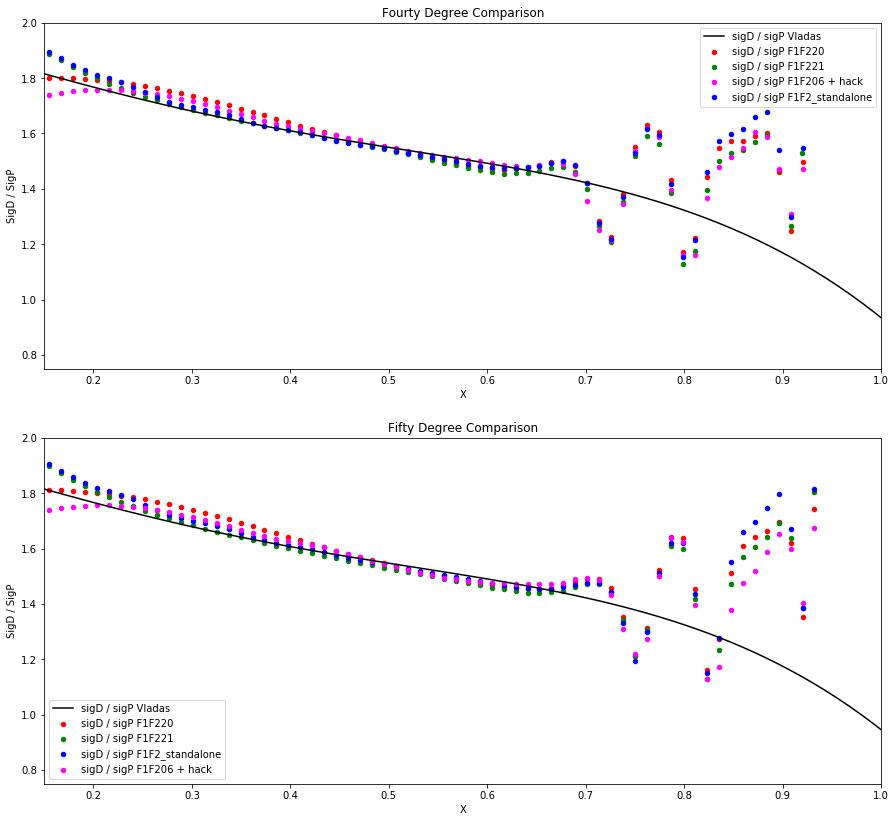

In [39]:
xmin=0.15
xmax=1.
doLog = True
fig, ax1 = plt.subplots(2,1,figsize=(15, 2*7))

fourtyDegCompF1F2in20_0.plot('x_bj','vladasFactor',c='black',xlim=(xmin,xmax),
        ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP Vladas')
fourtyDegCompF1F2in20.plot.scatter('x_bj','sigD_sigP_Ratio20',c='red',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F220')
fourtyDegCompF1F2in21.plot.scatter('x_bj','sigD_sigP_Ratio21',c='green',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F221')
fourtyDegCompF1F2in06.plot.scatter('x_bj','sigD_sigP_Ratio06',c='magenta',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F206 + hack')
fourtyDegCompF1F2in20_0.plot.scatter('x_bj','sigD_sigP_Ratio20_0',c='blue',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F2_standalone')
ax1[0].set_title("Fourty Degree Comparison")
ax1[0].set_ylabel("SigD / SigP")
ax1[0].set_xlabel("X")

fiftyDegCompF1F2in20_0.plot('x_bj','vladasFactor',color='black',xlim=(xmin,xmax),
    ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP Vladas')
fiftyDegCompF1F2in20.plot.scatter('x_bj','sigD_sigP_Ratio20',color='red',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F220')
fiftyDegCompF1F2in21.plot.scatter('x_bj','sigD_sigP_Ratio21',color='green',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F221')
fiftyDegCompF1F2in20_0.plot.scatter('x_bj','sigD_sigP_Ratio20_0',color='blue',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F2_standalone')
fiftyDegCompF1F2in06.plot.scatter('x_bj','sigD_sigP_Ratio06',color='magenta',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F206 + hack')
ax1[1].set_title("Fifty Degree Comparison")
ax1[1].set_ylabel("SigD / SigP")
ax1[1].set_xlabel("X")

Text(0.5, 0, 'X')

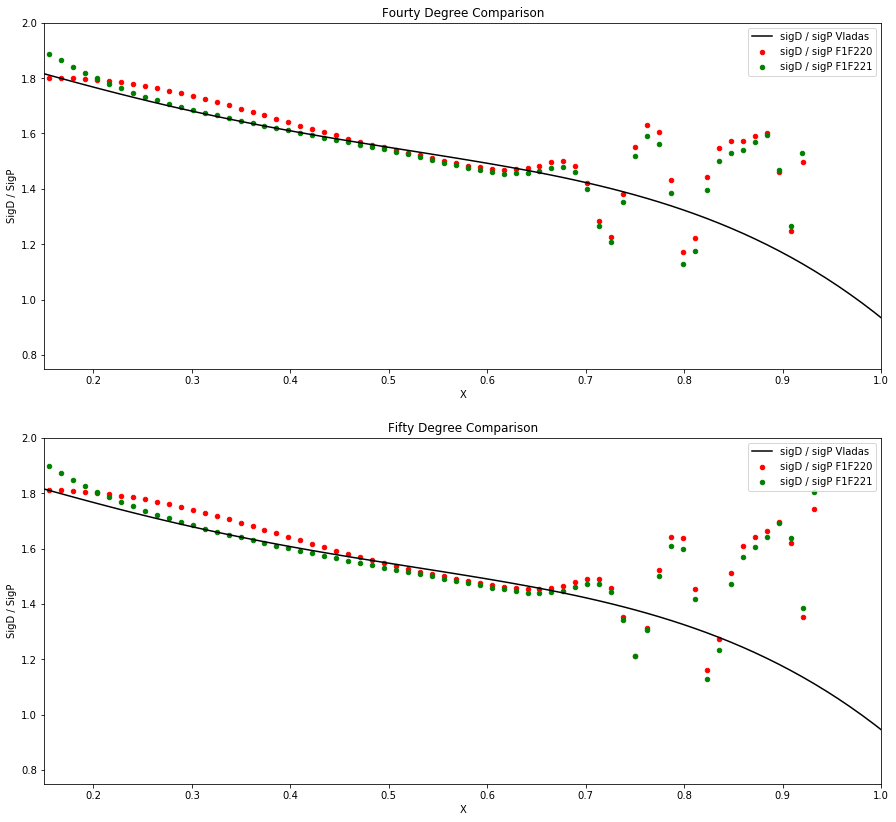

In [40]:
xmin=0.15
xmax=1.
doLog = True
fig, ax1 = plt.subplots(2,1,figsize=(15, 2*7))

fourtyDegCompF1F2in20_0.plot('x_bj','vladasFactor',c='black',xlim=(xmin,xmax),
        ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP Vladas')
fourtyDegCompF1F2in20.plot.scatter('x_bj','sigD_sigP_Ratio20',c='red',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F220')
fourtyDegCompF1F2in21.plot.scatter('x_bj','sigD_sigP_Ratio21',c='green',marker='o',
        linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[0], label='sigD / sigP F1F221')
ax1[0].set_title("Fourty Degree Comparison")
ax1[0].set_ylabel("SigD / SigP")
ax1[0].set_xlabel("X")

fiftyDegCompF1F2in20_0.plot('x_bj','vladasFactor',color='black',xlim=(xmin,xmax),
    ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP Vladas')
fiftyDegCompF1F2in20.plot.scatter('x_bj','sigD_sigP_Ratio20',color='red',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F220')
fiftyDegCompF1F2in21.plot.scatter('x_bj','sigD_sigP_Ratio21',color='green',marker='o',
    linestyle='None',xlim=(xmin,xmax),ylim=(0.75,2),logy=False,ax=ax1[1], label='sigD / sigP F1F221')
ax1[1].set_title("Fifty Degree Comparison")
ax1[1].set_ylabel("SigD / SigP")
ax1[1].set_xlabel("X")

In [20]:
print(fourtyDegCompF1F2in21)

Empty DataFrame
Columns: [x_bj, sigD_sigP_Ratio21]
Index: []
